## Imp Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import time
from datetime import date

In [2]:
!nvidia-smi

Sat Dec 19 04:02:14 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Dataset

A sales data record of 5000000* 14, with columns Region, Country, Item Type, Sales Channel, Order Priority, Order Date, Order ID, Ship date, units sold, unit price, unit cost, Total Revenue, Total Cost, Total Profit. 

No NA/ NAN is present in the dataset. 

The data is taken from http://eforexcel.com/wp/downloads-18-sample-csv-files-data-sets-for-testing-sales/ 

## Pandas

Pandas is probably the most popular method of reading datasets and is also the default on Kaggle. It has a lot of options, flexibility and functions for reading and processing data.

In [3]:
link  = '/content/drive/MyDrive/5m.csv'

In [4]:
import pandas as pd    #Hardware Accelerator: GPU
start = time.time()
df = pd.read_csv(link)
end = time.time() 
print(end-start)

8.243667840957642


In [5]:
df.shape

(5000000, 14)

In [6]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Palau,Office Supplies,Online,H,3/6/2016,517073523,3/26/2016,2401,651.21,524.96,1563555.21,1260428.96,303126.25
1,Europe,Poland,Beverages,Online,L,4/18/2010,380507028,5/26/2010,9340,47.45,31.79,443183.00,296918.60,146264.40
2,North America,Canada,Cereal,Online,M,1/8/2015,504055583,1/31/2015,103,205.70,117.11,21187.10,12062.33,9124.77
3,Europe,Belarus,Snacks,Online,C,1/19/2014,954955518,2/27/2014,1414,152.58,97.44,215748.12,137780.16,77967.96
4,Middle East and North Africa,Oman,Cereal,Offline,H,4/26/2019,970755660,6/2/2019,7027,205.70,117.11,1445453.90,822931.97,622521.93


## Dask
Dask provides a framework to scale pandas workflows natively using a parallel processing architecture. For those of you who have used Spark, you will find an uncanny similarity between the two.



In [7]:
pip install dask[complete]

     |████████████████████████████████| 675kB 18.4MB/s 
     |████████████████████████████████| 102kB 16.1MB/s 
     |████████████████████████████████| 102kB 15.5MB/s 
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4042 sha256=4af15d9cae5f9182c10f8c097a0070dcd2393c33984dba7d9fa0cfdac0599fea
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=094c2b0663c3e2088264e99993b17575b48a8711f0dceda308cf515471d5be65
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built locket contextvars
ERROR: distributed 2020.12.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
ERROR: distributed 2020.12.0 has requirement dask>=2020.12.0, but you'll have dask 2.12.0 which is incompatible.
  Found existing installation: distri

In [8]:
import dask.dataframe as dd   #Hardware Accelerator: GPU
start = time.time()
df = dd.read_csv(link).compute()
end = time.time()
print(end-start)

8.111949682235718


In [9]:
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Palau,Office Supplies,Online,H,3/6/2016,517073523,3/26/2016,2401,651.21,524.96,1563555.21,1260428.96,303126.25
1,Europe,Poland,Beverages,Online,L,4/18/2010,380507028,5/26/2010,9340,47.45,31.79,443183.00,296918.60,146264.40
2,North America,Canada,Cereal,Online,M,1/8/2015,504055583,1/31/2015,103,205.70,117.11,21187.10,12062.33,9124.77
3,Europe,Belarus,Snacks,Online,C,1/19/2014,954955518,2/27/2014,1414,152.58,97.44,215748.12,137780.16,77967.96
4,Middle East and North Africa,Oman,Cereal,Offline,H,4/26/2019,970755660,6/2/2019,7027,205.70,117.11,1445453.90,822931.97,622521.93


## Datatable
Datatable (heavily inspired by R's data.table) can read large datasets fairly quickly and is often faster than pandas. It is specifically meant for data processing of tabular datasets with emphasis on speed and support for large sized data.

In [10]:
pip install datatable

     |████████████████████████████████| 83.7MB 60kB/s 


In [11]:
import datatable as dt   #Hardware Accelerator: GPU
start = time.time()
df = dt.fread(link)
end = time.time()
print(end-start)

3.7144243717193604


In [12]:
df.head(5)

   | Region                        Country  Item Type        Sales Channel  Order Priority  Order Date   Order ID  …
-- + ----------------------------  -------  ---------------  -------------  --------------  ----------  ---------   
 0 | Australia and Oceania         Palau    Office Supplies  Online         H               3/6/2016    517073523  …
 1 | Europe                        Poland   Beverages        Online         L               4/18/2010   380507028  …
 2 | North America                 Canada   Cereal           Online         M               1/8/2015    504055583  …
 3 | Europe                        Belarus  Snacks           Online         C               1/19/2014   954955518  …
 4 | Middle East and North Africa  Oman     Cereal           Offline        H               4/26/2019   970755660  …

[5 rows x 14 columns]


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,Australia and Oceania,Palau,Office Supplies,Online,H,3/6/2016,517073523,3/26/2016,2401,651.21,524.96,1.56356e+06,1.26043e+06,303126
1,Europe,Poland,Beverages,Online,L,4/18/2010,380507028,5/26/2010,9340,47.45,31.79,443183,296919,146264
2,North America,Canada,Cereal,Online,M,1/8/2015,504055583,1/31/2015,103,205.7,117.11,21187.1,12062.3,9124.77
3,Europe,Belarus,Snacks,Online,C,1/19/2014,954955518,2/27/2014,1414,152.58,97.44,215748,137780,77968
4,Middle East and North Africa,Oman,Cereal,Offline,H,4/26/2019,970755660,6/2/2019,7027,205.7,117.11,1.44545e+06,822932,622522


In [13]:
df.shape

(5000000, 14)

Format: feather
It is common to store data in feather (binary) format specifically for pandas. It significantly improves reading speed of datasets.

## Modin

A library which helps pandas to read big files and boosts its speed. All syntax is same as pandas.

In [14]:
pip install modin[dask]

     |████████████████████████████████| 542kB 23.0MB/s 
     |████████████████████████████████| 9.5MB 49.9MB/s 
     |████████████████████████████████| 645kB 55.1MB/s 
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Found existing installation: distributed 2020.12.0
    Uninstalling distributed-2020.12.0:
      Successfully uninstalled distributed-2020.12.0


In [15]:
import modin.pandas as mpd    #Hardware Accelerator: GPU
start = time.time()
df = mpd.read_csv(link)
end = time.time()
print(end-start)

10.064692258834839


In [16]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Palau,Office Supplies,Online,H,3/6/2016,517073523,3/26/2016,2401,651.21,524.96,1563555.21,1260428.96,303126.25
1,Europe,Poland,Beverages,Online,L,4/18/2010,380507028,5/26/2010,9340,47.45,31.79,443183.00,296918.60,146264.40
2,North America,Canada,Cereal,Online,M,1/8/2015,504055583,1/31/2015,103,205.70,117.11,21187.10,12062.33,9124.77
3,Europe,Belarus,Snacks,Online,C,1/19/2014,954955518,2/27/2014,1414,152.58,97.44,215748.12,137780.16,77967.96
4,Middle East and North Africa,Oman,Cereal,Offline,H,4/26/2019,970755660,6/2/2019,7027,205.70,117.11,1445453.90,822931.97,622521.93


In [17]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!bash rapidsai-csp-utils/colab/rapids-colab.sh

import sys, os

dist_package_index = sys.path.index('/usr/local/lib/python3.6/dist-packages')
sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.6/site-packages'] + sys.path[dist_package_index:]
sys.path
exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 185 (delta 5), reused 0 (delta 0), pack-reused 171
Receiving objects: 100% (185/185), 57.14 KiB | 7.14 MiB/s, done.
Resolving deltas: 100% (67/67), done.
PLEASE READ
********************************************************************************************************
Changes:
1. IMPORTANT CHANGES: RAPIDS on Colab will be pegged to 0.14 Stable until further notice.
2. Default stable version is now 0.14.  Nightly will redirect to 0.14.
3. You can now declare your RAPIDSAI version as a CLI option and skip the user prompts (ex: '0.14' or '0.15', between 0.13 to 0.14, without the quotes): 
        "!bash rapidsai-csp-utils/colab/rapids-colab.sh <version/label>"
        Examples: '!bash rapidsai-csp-utils/colab/rapids-colab.sh 0.14', or '!bash rapidsai-csp-utils/colab/rapids-colab.sh stable', or '!bash rapi

In [18]:
import time

In [31]:
import cudf      #Hardware accelerator: GPU
start=time.time()
df=cudf.read_csv(link)
end=time.time()
print(end-start)

1.8249452114105225


In [20]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Palau,Office Supplies,Online,H,3/6/2016,517073523,3/26/2016,2401,651.21,524.96,1563555.21,1260428.96,303126.25
1,Europe,Poland,Beverages,Online,L,4/18/2010,380507028,5/26/2010,9340,47.45,31.79,443183.00,296918.60,146264.40
2,North America,Canada,Cereal,Online,M,1/8/2015,504055583,1/31/2015,103,205.70,117.11,21187.10,12062.33,9124.77
3,Europe,Belarus,Snacks,Online,C,1/19/2014,954955518,2/27/2014,1414,152.58,97.44,215748.12,137780.16,77967.96
4,Middle East and North Africa,Oman,Cereal,Offline,H,4/26/2019,970755660,6/2/2019,7027,205.70,117.11,1445453.90,822931.97,622521.93


In [21]:
import dask_cudf
start=time.time()
df=dask_cudf.read_csv(link)
end=time.time()
print(end-start)

0.09330940246582031


In [23]:
!nvidia-smi

Sat Dec 19 04:22:30 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    27W /  70W |   1143MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [24]:
#no.of sockets i.e available slots for physical processors
!lscpu | grep 'Socket(s):'

Socket(s):           1


In [25]:
!lscpu | grep 'Core(s) per socket:'

Core(s) per socket:  1


In [26]:
!lscpu | grep 'Thread(s) per core'
 

Thread(s) per core:  2


In [27]:
!lscpu | grep "L3 cache"

L3 cache:            56320K


In [28]:
!lscpu | grep "MHz"

CPU MHz:             2199.998


In [29]:
!free -h --si | awk  '/Mem:/{print $2}'

13G


In [30]:
!df -h / | awk '{print $4}'

Avail
26G






## Time analysis on GPU
Pandas    = 9.28 sec.

Dask      = 9.24 sec.

Datatable = 4.364 sec.

Modin     = 9.73 sec.

Dask_cudf = 0.0644 sec. 

CUDF = 1.82 sec.

Modin > pandas > Dask > Datatable > CUDF > Dask_cudf

1. The Datatable toolkit resembeles pandas very closely but is more focused on speed.

2. cuDF and dask_cudf is a special library designed to work on GPU

3. It is seen Pandas performs better than Modin on GPU.

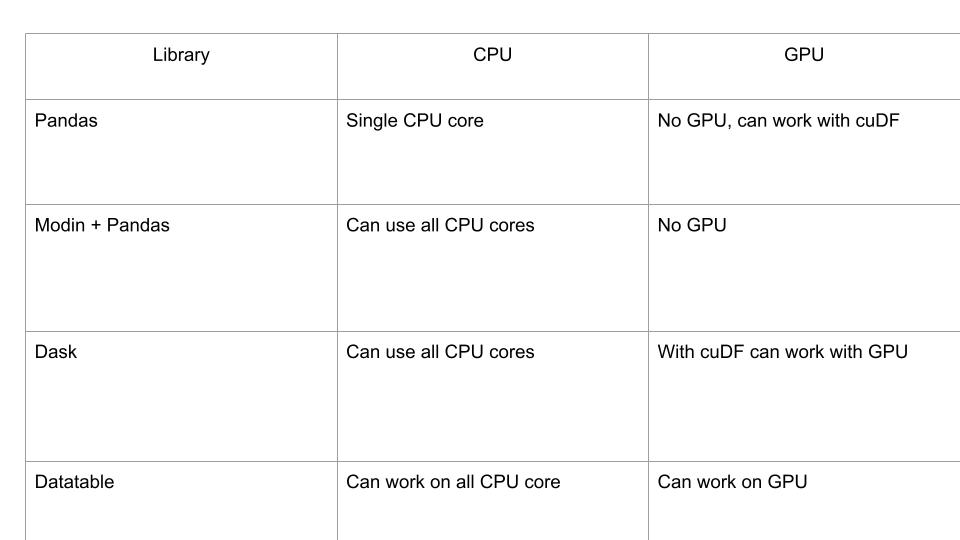

# Conclusion

cuDf or dask_cudf should be preferred if GPU is available, and we have to choose between these two prefer dask_cudf for gb's of data